In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import glob
import numpy as np
plt.rcParams['font.family'] = 'Malgun Gothic' # Malgun Gothic을 적용
plt.rcParams['axes.unicode_minus'] = False

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('bi_8.csv', usecols=[1,2,3,4,5,6,7], index_col=0)
df

,22시승차총승객수,22시하차총승객수,23시승차총승객수,23시하차총승객수,승차승객합,하차승객합
dname,,,,,,
가락동,20282,28436,11987,17002,32269,45438
가락본동,8813,7509,3674,4476,12487,11985
가리봉동,2714,4068,1444,2458,4158,6526
가산동,30066,22658,14479,13445,44545,36103
가양동,25272,15744,11193,7633,36465,23377
...,...,...,...,...,...,...
효창동,3199,7373,1670,4081,4869,11454
후암동,3657,8385,1372,5003,5029,13388
휘경동,17225,18498,9263,10527,26488,29025


In [3]:
df.describe()

,22시승차총승객수,22시하차총승객수,23시승차총승객수,23시하차총승객수,승차승객합,하차승객합
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,14363.157143,14579.731429,7589.668571,8447.091429,21952.825714,23026.822857
std,19965.416939,17323.121797,10826.793876,10090.356126,30645.989659,27363.216328
min,0.000000,2.000000,0.000000,0.000000,0.000000,4.000000
25%,2531.000000,3087.500000,1191.000000,1602.250000,3691.250000,4820.500000
50%,6791.000000,8366.000000,3329.000000,4962.500000,10165.000000,13331.000000
75%,18645.500000,19080.750000,9931.500000,11132.500000,29073.000000,29160.000000
max,146934.000000,99706.000000,88750.000000,63586.000000,235684.000000,163292.000000


In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [5]:
scaler.fit(df)

MinMaxScaler()

In [6]:
df_scaled = scaler.transform(df)
df_scaled.shape

(350, 6)

In [8]:
df_scaled

array([[0.13803476, 0.28518415, 0.13506479, 0.2673859 , 0.13691638,
        0.27824457],
       [0.05997931, 0.07529287, 0.04139718, 0.07039285, 0.05298196,
        0.07337343],
       [0.01847088, 0.04078071, 0.01627042, 0.03865631, 0.01764227,
        0.0399417 ],
       ...,
       [0.1172295 , 0.18550911, 0.10437183, 0.16555531, 0.11238777,
        0.17772892],
       [0.12406931, 0.21773449, 0.12304225, 0.22476646, 0.12368256,
        0.22046323],
       [0.00392013, 0.0056768 , 0.00592676, 0.01363508, 0.00467575,
        0.00876366]])

In [9]:
df_scaled = df_scaled.transpose()

In [10]:
df_scaled.shape

(6, 350)

In [18]:
df_scaled_df = pd.DataFrame({
    '22시승차총승객수' : df_scaled[0],
    '22시하차총승객수' : df_scaled[1],
    '23시승차총승객수' : df_scaled[2],
    '23시하차총승객수' : df_scaled[3],
    '승차승객합' : df_scaled[4],
    '하차승객합' : df_scaled[5]}, index = df.index
)

In [19]:
df_scaled_df

,22시승차총승객수,22시하차총승객수,23시승차총승객수,23시하차총승객수,승차승객합,하차승객합
dname,,,,,,
가락동,0.138035,0.285184,0.135065,0.267386,0.136916,0.278245
가락본동,0.059979,0.075293,0.041397,0.070393,0.052982,0.073373
가리봉동,0.018471,0.040781,0.016270,0.038656,0.017642,0.039942
가산동,0.204622,0.227233,0.163144,0.211446,0.189003,0.221076
가양동,0.171996,0.157887,0.126118,0.120042,0.154720,0.143140
...,...,...,...,...,...,...
효창동,0.021772,0.073929,0.018817,0.064181,0.020659,0.070122
후암동,0.024889,0.084079,0.015459,0.078681,0.021338,0.081966
휘경동,0.117230,0.185509,0.104372,0.165555,0.112388,0.177729


In [20]:
import matplotlib.pyplot as plt

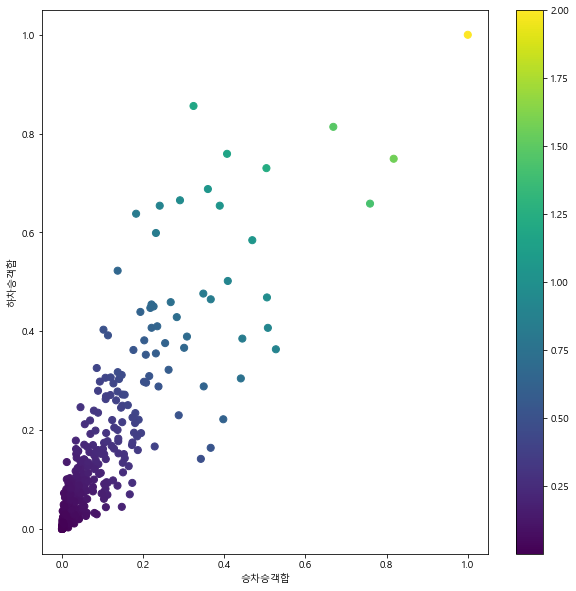

In [21]:
plt.figure(figsize = (10, 10))
plt.scatter(df_scaled_df['승차승객합'], df_scaled_df['하차승객합'], 
            c = (df_scaled_df['승차승객합'] + df_scaled_df['하차승객합']), s = 50)
plt.colorbar()
plt.xlabel('승차승객합')
plt.ylabel('하차승객합')
plt.show()

In [22]:
df_scaled_df['popular'] = (df_scaled_df['승차승객합'] + df_scaled_df['하차승객합']) / 2
df_sort = df_scaled_df.sort_values(by = 'popular', ascending=False)
df_sort

,22시승차총승객수,22시하차총승객수,23시승차총승객수,23시하차총승객수,승차승객합,하차승객합,popular
dname,,,,,,,
신림동,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
구로동,0.810275,0.800861,0.829172,0.668087,0.817391,0.749155,0.783273
목동,0.748921,0.859785,0.535639,0.741515,0.668607,0.813728,0.741168
역삼동,0.789987,0.712369,0.707966,0.573727,0.759101,0.658377,0.708739
봉천동,0.505009,0.741234,0.501701,0.712877,0.503764,0.730188,0.616976
...,...,...,...,...,...,...,...
동빙고동,0.000218,0.000171,0.000000,0.000000,0.000136,0.000092,0.000114
홍파동,0.000048,0.000221,0.000011,0.000047,0.000034,0.000141,0.000087
현저동,0.000000,0.000100,0.000000,0.000204,0.000000,0.000129,0.000064


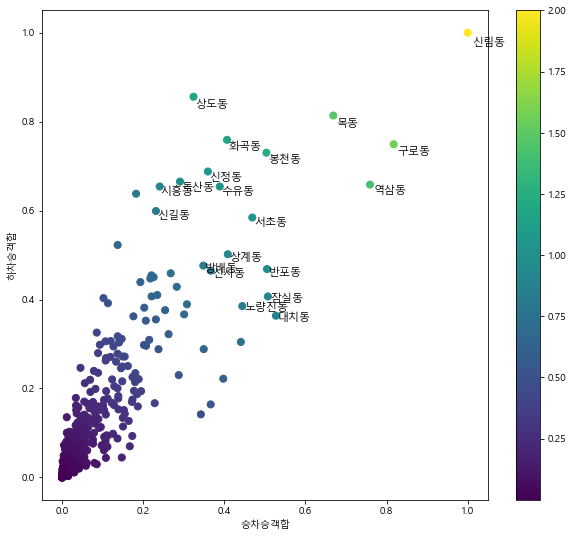

In [33]:
plt.figure(figsize = (10, 9))
plt.scatter(df_sort['승차승객합'], df_sort['하차승객합'], 
            c = (df_sort['승차승객합'] + df_sort['하차승객합']), s = 50)

for n in range(20):
    plt.text(df_sort['승차승객합'][n]*1.01, df_sort['하차승객합'][n]*(0.97), df_sort.index[n], fontsize = 11)

plt.colorbar()
plt.xlabel('승차승객합')
plt.ylabel('하차승객합')
plt.show()

In [34]:
# standard scaler
from sklearn.preprocessing import StandardScaler
scaler2 = StandardScaler()

df = pd.read_csv('bi_8.csv', usecols=[1,2,3,4,5,6,7], index_col=0)
df

,22시승차총승객수,22시하차총승객수,23시승차총승객수,23시하차총승객수,승차승객합,하차승객합
dname,,,,,,
가락동,20282,28436,11987,17002,32269,45438
가락본동,8813,7509,3674,4476,12487,11985
가리봉동,2714,4068,1444,2458,4158,6526
가산동,30066,22658,14479,13445,44545,36103
가양동,25272,15744,11193,7633,36465,23377
...,...,...,...,...,...,...
효창동,3199,7373,1670,4081,4869,11454
후암동,3657,8385,1372,5003,5029,13388
휘경동,17225,18498,9263,10527,26488,29025


In [35]:
scaler2.fit(df)

StandardScaler()

In [36]:
df_scaled2 = scaler2.transform(df)
df_scaled2.shape

(350, 6)

In [53]:
type(df_scaled2)

numpy.ndarray

In [37]:
df_scaled2 = df_scaled2.transpose()

In [38]:
df_scaled_df2 = pd.DataFrame({
    '22시승차총승객수' : df_scaled2[0],
    '22시하차총승객수' : df_scaled2[1],
    '23시승차총승객수' : df_scaled2[2],
    '23시하차총승객수' : df_scaled2[3],
    '승차승객합' : df_scaled2[4],
    '하차승객합' : df_scaled2[5]
}, index = df.index
)

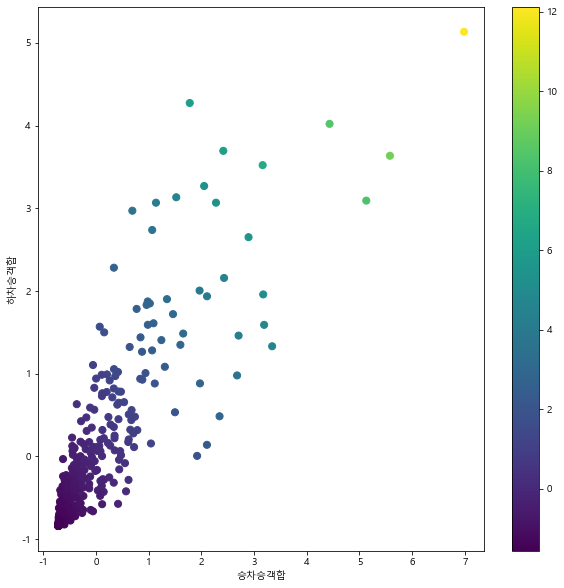

In [39]:
plt.figure(figsize = (10, 10))
plt.scatter(df_scaled_df2['승차승객합'], df_scaled_df2['하차승객합'], 
            c = (df_scaled_df2['승차승객합'] + df_scaled_df2['하차승객합']), s = 50)
plt.colorbar()
plt.xlabel('승차승객합')
plt.ylabel('하차승객합')
plt.show()

In [40]:
df_scaled_df2['popular'] = (df_scaled_df2['승차승객합'] + df_scaled_df2['하차승객합']) / 2
df_sort2 = df_scaled_df2.sort_values(by = 'popular', ascending=False)
df_sort2

,22시승차총승객수,22시하차총승객수,23시승차총승객수,23시하차총승객수,승차승객합,하차승객합,popular
dname,,,,,,,
신림동,6.649530,4.921061,7.506980,5.472339,6.984182,5.133387,6.058784
구로동,5.251267,3.773264,6.104653,3.377743,5.577811,3.634344,4.606078
목동,4.799089,4.112892,3.695048,3.841125,4.431945,4.020231,4.226088
역삼동,5.101745,3.263216,5.109677,2.782265,5.128889,3.091856,4.110372
봉천동,3.001466,3.429590,3.416451,3.660397,3.162395,3.521001,3.341698
...,...,...,...,...,...,...,...
동빙고동,-0.718827,-0.841741,-0.702012,-0.838344,-0.716316,-0.842034,-0.779175
홍파동,-0.720081,-0.841452,-0.701919,-0.838046,-0.717100,-0.841741,-0.779421
현저동,-0.720432,-0.842145,-0.702012,-0.837053,-0.717362,-0.841815,-0.779588


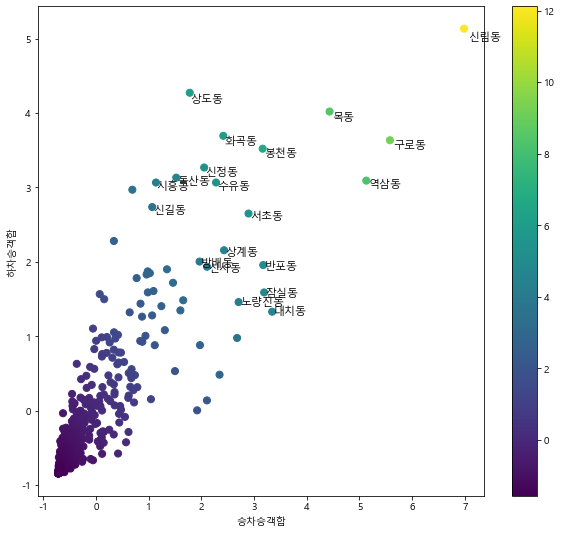

In [41]:
plt.figure(figsize = (10, 9))
plt.scatter(df_sort2['승차승객합'], df_sort2['하차승객합'], 
            c = (df_sort2['승차승객합'] + df_sort2['하차승객합']), s = 50)

for n in range(20):
    plt.text(df_sort2['승차승객합'][n]*1.01, df_sort2['하차승객합'][n]*(0.97), df_sort2.index[n], fontsize = 11)

plt.colorbar()
plt.xlabel('승차승객합')
plt.ylabel('하차승객합')
plt.show()

In [57]:
# 클러스터링 구현
from sklearn.cluster import KMeans

dX = np.array([list(df_sort['승차승객합']), list(df_sort['하차승객합'])])
dX = dX.transpose()


In [61]:
dX.shape

(350, 2)

In [62]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(dX)

KMeans(n_clusters=4)

In [65]:
cluster_li = (kmeans.predict(dX))

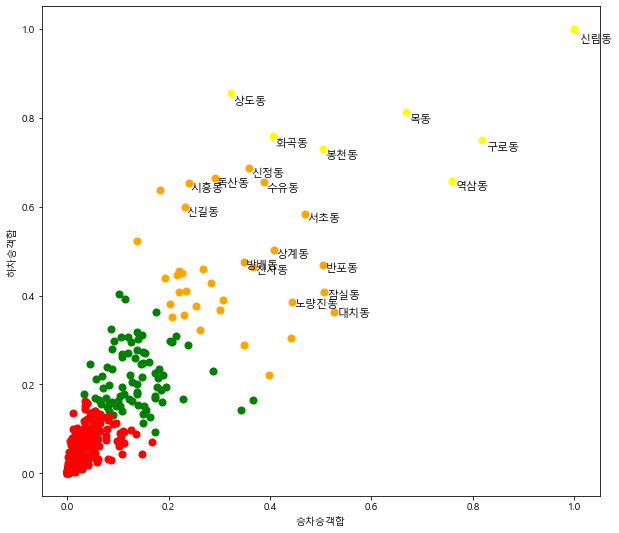

In [67]:
color_li = ['red','orange','yellow','green']

plt.figure(figsize = (10, 9))
for i in range(350):
    plt.scatter(df_sort['승차승객합'][i], df_sort['하차승객합'][i], 
                c = color_li[cluster_li[i]], s = 50)

for n in range(20):
    plt.text(df_sort['승차승객합'][n]*1.01, df_sort['하차승객합'][n]*(0.97), df_sort.index[n], fontsize = 11)

plt.xlabel('승차승객합')
plt.ylabel('하차승객합')
plt.show()